# Pyber Challenge

In [4]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

In [5]:
# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"
ride_data_to_load

'Resources/ride_data.csv'

In [6]:
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [7]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.tail(100)

,city,date,fare,ride_id,driver_count,type
2275,North Jaime,2019-03-06 09:09:23,44.17,1152195873170,1,Rural
2276,Penaborough,2019-02-24 00:44:00,21.89,2069309881916,6,Rural
2277,North Jaime,2019-03-12 13:05:56,23.21,5987447089759,1,Rural
2278,Lake Latoyabury,2019-04-16 21:12:48,24.10,4896030744313,2,Rural
2279,South Jennifer,2019-03-07 19:10:13,48.79,9730627367446,7,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [8]:
pyber_data_df.tail(40)
pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          2375 non-null   object 
 1   date          2375 non-null   object 
 2   fare          2375 non-null   float64
 3   ride_id       2375 non-null   int64  
 4   driver_count  2375 non-null   int64  
 5   type          2375 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


## Deliverable 1: Get a Summary DataFrame 

In [9]:
# In Step 1, use the groupby() function to create a Series of data that has the type of city as the index, then apply the count() method to the "ride_id" column.
# The total number of rides for each city type is retrieved (5 pt)

total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [10]:
# In Step 2, use the groupby() function to create a Series of data that has the type of city as the index, then apply the sum() method to the "driver_count" column.
# The total number of drivers for each city type is retrieved (5 pt)

total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [11]:
# In Step 3, use the groupby() function to create a Series of data that has the type of city as the index, then apply the sum() method to the "fare" column.
# The sum of the fares for each city type is retrieved (5 pt)

total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [12]:
# In Step 4, calculate the average fare per ride by city type by dividing the sum of all the fares by the total rides.
# ​The average fare per ride for each city type is calculated (5 pt)

average_fare_per_ride = pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df.groupby(["type"]).count()["ride_id"]
average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [13]:
# In Step 5, calculate the average fare per driver by city type by dividing the sum of all the fares by the total drivers.
# The average fare per driver for each city type is calculated (5 pt)

average_fare_per_driver = pyber_data_df.groupby(["type"]).sum()["fare"] / city_data_df.groupby(["type"]).sum()["driver_count"]
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [14]:
#  6. Create a PyBer summary DataFrame. PyBer summary DataFrame is created (5 pt)

summary_df = pd.DataFrame({
    "Total Rides": total_rides,
    "Total Drivers": total_drivers,
    "Total Fares": total_fares,
    "Average Fare per Ride": average_fare_per_ride,
    "Average Fare per Driver": average_fare_per_driver})
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [15]:
#  7. The PyBer summary DataFrame is formatted as shown in the example (5 pt)

summary_df_format = pd.DataFrame({
    "Total Rides": total_rides,
    "Total Drivers": total_drivers,
    "Total Fares": total_fares,
    "Average Fare per Ride": average_fare_per_ride,
    "Average Fare per Driver": average_fare_per_driver})

summary_df_format["Total Rides"] = summary_df["Total Rides"].map("{:,}".format)
summary_df_format["Total Drivers"] = summary_df["Total Drivers"].map("{:,}".format)
summary_df_format["Total Fares"] = summary_df["Total Fares"].map("${:,.2f}".format)
summary_df_format["Average Fare per Ride"] = summary_df["Average Fare per Ride"].map("${:,.2f}".format)
summary_df_format["Average Fare per Driver"] = summary_df["Average Fare per Driver"].map("${:,.2f}".format)

summary_df_format.head(3)

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [10]:
# Deliverable 1 Requirements have earned all 35 points


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city

In [16]:
# In Step 1, create a new DataFrame with multiple indices using the groupby() function on the "type" and "date" columns of
# the pyber_data_df DataFrame, then apply the sum() method on the "fare" column to show the total fare amount for each date.

total_fares_by_typedate = pyber_data_df.groupby(["type", "date"]).sum()["fare"]
total_fares_by_typedate

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [17]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares for each date where the indices are the city type and date.

# A DataFrame was created using the groupby() function on the "type" and "date" columns, and the sum()
# method is applied on the "fare" column to show the total fare amount for each date and time (10 pt)

summary_by_typedate_df = pd.DataFrame({
    "Total Fares": total_fares_by_typedate,
   })
summary_by_typedate_df

Total Fares
type  date                            
Rural 2019-01-01 09:45:36        43.69
      2019-01-02 11:18:32        52.12
      2019-01-03 19:51:01        19.90
      2019-01-04 03:31:26        24.88
      2019-01-06 07:38:40        47.33
...                                ...
Urban 2019-05-08 04:20:00        21.99
      2019-05-08 04:39:49        18.45
      2019-05-08 07:29:01        18.55
      2019-05-08 11:38:35        19.77
      2019-05-08 13:10:18        18.04

[2375 rows x 1 columns]

In [19]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

summary_by_typedate_df = summary_by_typedate_df.reset_index()

In [20]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' to get the total fares for each type of city by the date. 

# This DataFrame is created using the pivot() function where the index is the "date," the columns are the city "type," and the values are the "fare" (10 pt)

# The DataFrame below looks exactly like the picture in the module description.

summary_by_typedate_df_pivot = summary_by_typedate_df.pivot(index="date", columns = "type", values = "Total Fares")
summary_by_typedate_df_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [21]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29' (5 pt)

summary_by_typedate_df_pivot_Jan_Apr = summary_by_typedate_df_pivot.loc['2019-01-01':'2019-04-29']
summary_by_typedate_df_pivot_Jan_Apr


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [22]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

summary_by_typedate_df_pivot_Jan_Apr.index = pd.to_datetime(summary_by_typedate_df_pivot_Jan_Apr.index)

In [23]:
# 7. Check that the datatype for the index is datetime using df.info()
summary_by_typedate_df_pivot_Jan_Apr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [24]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

# DataFrame created using the resample() function in weekly bins showing the sum of the fares for each week (10 pt)

# The DataFrame below looks exactly like the picture in the module description

summary_by_typedate_df_pivot_Jan_Apr_resampled = summary_by_typedate_df_pivot_Jan_Apr.resample("W").sum()

summary_by_typedate_df_pivot_Jan_Apr_resampled

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [25]:
summary_by_typedate_df_pivot_Jan_Apr_resampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17 entries, 2019-01-06 to 2019-04-28
Freq: W-SUN
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     17 non-null     float64
 1   Suburban  17 non-null     float64
 2   Urban     17 non-null     float64
dtypes: float64(3)
memory usage: 544.0 bytes


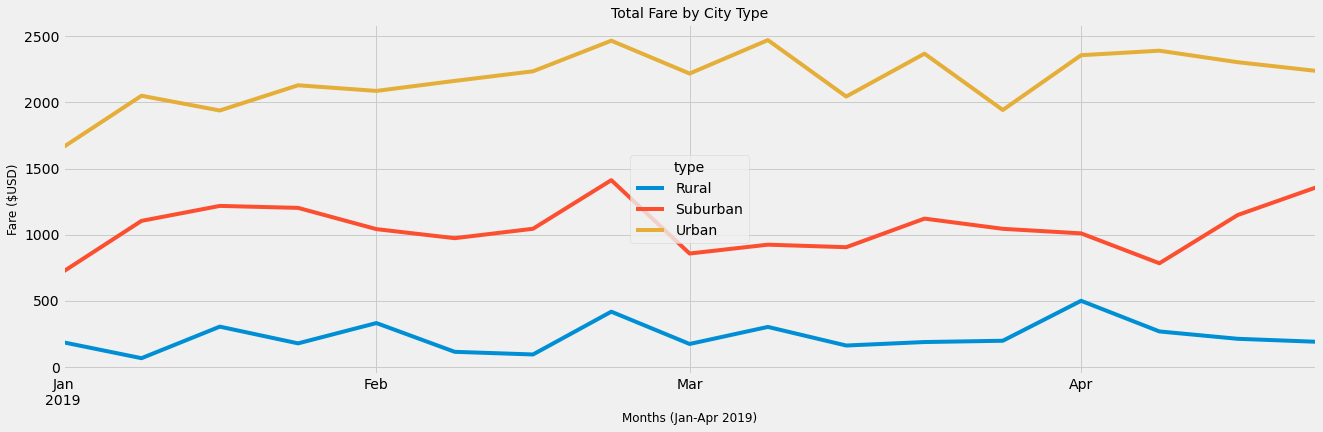

In [26]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.

# Finally, in Step 8, graph the resampled DataFrame from Step 7 using the object-oriented interface method and the df.plot()
# method, as well as the Matplotlib "fivethirtyeight" graph style code snippet provided in the starter code. Annotate the y-axis
# label and the title, then use the appropriate code to save the figure as PyBer_fare_summary.png in your "analysis" folder (10 pt)
# Import the style from Matplotlib.

from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
summary_by_typedate_df_pivot_Jan_Apr_resampled.plot(figsize=(20,6))
plt.ylabel('Fare ($USD)', fontsize=12)
plt.xlabel('Months (Jan-Apr 2019)', fontsize=12)
plt.title("Total Fare by City Type", fontsize=14)
# Save the figure in the Analysis and Resources folders.
plt.savefig("Resources/TotalFareByCityType.png")
plt.savefig("analysis/TotalFareByCityType.png")
plt.show()